# **Tweet Classification Using Bi-LSTM model in Keras**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv


# I. Importing required libraries

In [2]:
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import re
import nltk
from nltk.corpus import stopwords

Using TensorFlow backend.


# II. Basic Text Preprocessing

In [3]:
StopWords = set(stopwords.words('english'))
def text_preprocess(text):
    text = ' '.join([i for i in text.split() if i not in StopWords]) #removing stopwords from each tweet
    text = ' '.join([i for i in text.split() if ('http' not in i and '@' not in i and 'https' not in i)]) #removing mentions and urls
    text = re.sub('#', '', text) #removing hashtags while keeping the tagged word :p
    return text

#The Keras Tokenizer deals with lower-casing of text and editing out punctuations.

In [4]:
train_data = pd.read_csv("../input/nlp-getting-started/train.csv")
test_data = pd.read_csv('../input/nlp-getting-started/test.csv')

X_train = train_data['text']
y_train = train_data['target']
X_test = test_data['text']
test_idx = test_data['id']

train_data['text'] = train_data['text'].apply(text_preprocess)
X_train = train_data['text']
test_data['text'] = test_data['text'].apply(text_preprocess)
X_test = test_data['text']

X_train = X_train.tolist()
X_test = X_test.tolist()
print(X_train)
        
        
       



['Our Deeds Reason earthquake May ALLAH Forgive us', 'Forest fire near La Ronge Sask. Canada', "All residents asked 'shelter place' notified officers. No evacuation shelter place orders expected", '13,000 people receive wildfires evacuation orders California', 'Just got sent photo Ruby Alaska smoke wildfires pours school', 'RockyFire Update => California Hwy. 20 closed directions due Lake County fire - CAfire wildfires', 'flood disaster Heavy rain causes flash flooding streets Manitou, Colorado Springs areas', "I'm top hill I see fire woods...", "There's emergency evacuation happening building across street", "I'm afraid tornado coming area...", 'Three people died heat wave far', 'Haha South Tampa getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK flooding', "raining flooding Florida TampaBay Tampa 18 19 days. I've lost count", 'Flood Bago Myanmar We arrived Bago', 'Damage school bus 80 multi car crash BREAKING', "What's man?", 'I love f

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index)
max_len = 150
train_seq = tokenizer.texts_to_sequences(X_train)
train_pad = pad_sequences(train_seq, maxlen=max_len, padding='pre')
test_seq = tokenizer.texts_to_sequences(X_test)
test_pad = pad_sequences(test_seq, maxlen=max_len, padding='pre')



#sanity check to make sure stopwords have been removed. Just a useful way of checking.
for idx, word in tokenizer.word_index.items():
    if word in StopWords:
        print("F")
    else:
        print("T")

T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T


# III. Training the RNN(Bi-LSTM) model:

In [6]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size+1, 200, input_length=max_len),
    keras.layers.SpatialDropout1D(0.5),
    keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.LSTM(32)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
optimizer = keras.optimizers.Adam(learning_rate = 0.01)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(train_pad, y_train, epochs=40)


/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/40
7613/7613 [==============================] - 57s 8ms/step - loss: 0.5128 - accuracy: 0.7554
Epoch 2/40
7613/7613 [==============================] - 55s 7ms/step - loss: 0.2720 - accuracy: 0.9010
Epoch 3/40
7613/7613 [==============================] - 54s 7ms/step - loss: 0.1507 - accuracy: 0.9452
Epoch 4/40
7613/7613 [==============================] - 55s 7ms/step - loss: 0.1025 - accuracy: 0.9595
Epoch 5/40
7613/7613 [==============================] - 54s 7ms/step - loss: 0.0742 - accuracy: 0.9685
Epoch 6/40
7613/7613 [==============================] - 54s 7ms/step - loss: 0.0636 - accuracy: 0.9732
Epoch 7/40
7613/7613 [==============================] - 54s 7ms/step - loss: 0.0562 - accuracy: 0.9756
Epoch 8/40
7613/7613 [==============================] - 54s 7ms/step - loss: 0.0512 - accuracy: 0.9771
Epoch 9/40
7613/7613 [==============================] - 54s 7ms/step - loss: 0.0545 - accuracy: 0.9771
Epoch 10/40
7613/7613 [==============================] - 55s 7ms/step - l

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 200)          3168400   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 150, 200)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 150, 128)          135680    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_1 (Dense)              (None, 200)               13000     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 3,358,497
Trainable params: 3,358,497
Non-trainable params: 0
____________________________________________

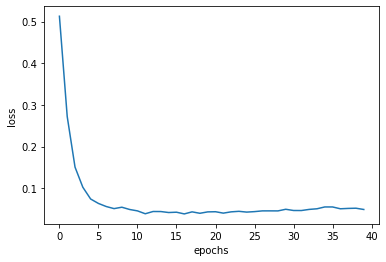

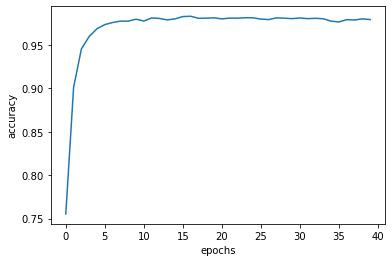

In [8]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'loss')
plot_graphs(history, 'accuracy')

# IV. Generating output target labels.

In [9]:
model.predict_classes(test_pad)

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [10]:
pred = pd.DataFrame()
pred['id'] = test_idx
pred['target'] = model.predict_classes(test_pad)
print(pred)

         id  target
0         0       1
1         2       0
2         3       1
3         9       1
4        11       1
...     ...     ...
3258  10861       1
3259  10865       1
3260  10868       1
3261  10874       1
3262  10875       1

[3263 rows x 2 columns]


In [11]:
pred.to_csv('submission.csv', index=False)
print("Submission has been saved")

Submission has been saved
